In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from yellowbrick.datasets import load_credit

In [3]:
from yellowbrick.classifier.rocauc import roc_auc

In [4]:
X, y = load_credit()

In [5]:
X.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [7]:
#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
model = LogisticRegression(multi_class="auto", solver="liblinear")

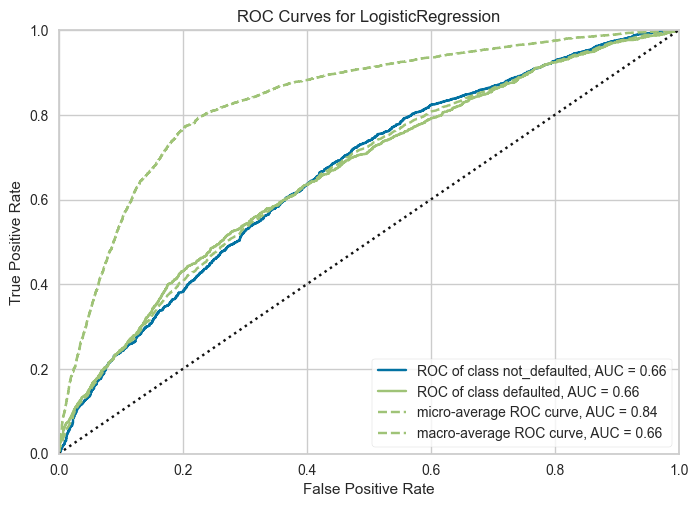

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['not_defaulted', 'defaulted'],
       estimator=LogisticRegression(solver='liblinear'))

In [9]:
roc_auc(model,
        X_train,
        y_train,
        X_test=X_test,
        y_test=y_test,
        classes=['not_defaulted', 'defaulted']
       )